В этом уроке применим линейную регрессию на практике – попробуем предсказать стоимость машин и понять, от каких факторов зависит ценообразование на автомобили. Помимо этого узнаем, какие переменные важны для прогнозирования и насколько хорошо полученная модель описывает данные https://stepik.org/media/attachments/lesson/387691/cars.csv.

Задание:

* Загрузите данные, проверьте правильность, наличие пропущенных значений, типы данных.

* Создайте новый признак – марку автомобиля (company). Машины каких производителей встречаются в датасете? Далее исправьте названия и проверьте изменения.

* Оставьте только часть предикторов, после чего посчитайте корреляцию между price и другими переменными.

* Преобразуйте категориальные переменные с помощью pd.get_dummies(). 

* Постройте модель с одним предиктором цены – horsepower. Какой процент изменчивости объясняет полученная модель? ($R^2$))

* Далее – две модели (со всеми предикторами и со всеми, кроме марок машин). Обратите внимание на изменения в \($R^2$\), коэффициентах и их значимости. Какую модель лучше оставить? 

* Заполните пропуски в результатах.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

1. Загрузите данные, проверьте типы, пропущенные значения. 

Сколько пропущенных значений встретилось в датасете?

In [2]:
df = pd.read_csv('https://stepik.org/media/attachments/lesson/387691/cars.csv')

In [4]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
df.shape

(205, 26)

In [7]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [8]:
# Как мы видим нет никаких пропущенных значений

In [9]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

2. Сгенерируем первый признак.

Использовать полное название машины – не самый хороший вариант, поэтому создадим новый признак – марку автомобиля (company). Для этого используйте столбец CarName, разбейте значения ячеек по пробелу и запишите в колонку первый элемент. Например:

'audi 100 ls' → 'audi'
Сколько всего уникальных марок машины встречается в датасете? Столбец CarName с полным названием машины удалите из датасета, а также car_ID, они не пригодятся для дальнейшего анализа.

In [19]:
df['CarName'] = df['CarName'].apply(lambda x: x.split()[0])

In [20]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [22]:
df = df.drop(columns='car_ID')

In [23]:
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [26]:
# Количество уникальных машин в нашем датасете
df.CarName.nunique()

28

4. Теперь внимательнее посмотрите на уникальные значения company. Часть из них оказалась с ошибками!

'maxda' → 'mazda'

'Nissan' → 'nissan'

'porcshce' → 'porsche'

'toyouta' → 'toyota'

'vokswagen' & 'vw' → 'volkswagen'

Сколько уникальных производителей осталось в итоге?

In [30]:
def correct(x):
    if x == 'maxda':
        return 'mazda'
    elif x == 'Nissan':
        return 'nissan'
    elif x == 'porcshce':
        return 'porsche'
    elif x == 'toyouta':
        return 'toyota'
    elif x in ('vokswagen', 'vw'):
        return 'volkswagen'
    else:
        return x

In [31]:
df['CarName'] = df.CarName.apply(correct)

In [34]:
df.CarName.nunique()
# В итоге осталось 22 уникальных производителей

22

4. Отлично! Чтобы не перегружать модель большим количеством предикторов, оставим только часть из них:

'company', 'fueltype', 'aspiration','carbody', 'drivewheel', 'wheelbase', 'carlength','carwidth', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower'
также не забыв про то, что мы предсказываем – 'price'. 

После этого посчитайте корреляцию между price и другими переменными. Чему равна корреляция между price и horsepower? Ответ округлите до 2 знаков после точки.

Hint: можно использовать метод для датафрейма – .corr()

In [58]:
df = df.rename(columns={'CarName' : 'company'})
data = df[['company', 'fueltype', 'aspiration','carbody', 'drivewheel', 'wheelbase', 
           'carlength','carwidth', 'curbweight', 
           'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 'price']]
data

,company,fueltype,aspiration,carbody,drivewheel,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,price
0,alfa-romero,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,13495.0
1,alfa-romero,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,16500.0
2,alfa-romero,gas,std,hatchback,rwd,94.5,171.2,65.5,2823,ohcv,six,152,2.68,154,16500.0
3,audi,gas,std,sedan,fwd,99.8,176.6,66.2,2337,ohc,four,109,3.19,102,13950.0
4,audi,gas,std,sedan,4wd,99.4,176.6,66.4,2824,ohc,five,136,3.19,115,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,std,sedan,rwd,109.1,188.8,68.9,2952,ohc,four,141,3.78,114,16845.0
201,volvo,gas,turbo,sedan,rwd,109.1,188.8,68.8,3049,ohc,four,141,3.78,160,19045.0
202,volvo,gas,std,sedan,rwd,109.1,188.8,68.9,3012,ohcv,six,173,3.58,134,21485.0
203,volvo,diesel,turbo,sedan,rwd,109.1,188.8,68.9,3217,ohc,six,145,3.01,106,22470.0


In [59]:
data.corr()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price
wheelbase,1.000000,0.874587,0.795144,0.776386,0.569329,0.488750,0.353294,0.577816
carlength,0.874587,1.000000,0.841118,0.877728,0.683360,0.606454,0.552623,0.682920
carwidth,0.795144,0.841118,1.000000,0.867032,0.735433,0.559150,0.640732,0.759325
curbweight,0.776386,0.877728,0.867032,1.000000,0.850594,0.648480,0.750739,0.835305
enginesize,0.569329,0.683360,0.735433,0.850594,1.000000,0.583774,0.809769,0.874145
boreratio,0.488750,0.606454,0.559150,0.648480,0.583774,1.000000,0.573677,0.553173
horsepower,0.353294,0.552623,0.640732,0.750739,0.809769,0.573677,1.000000,0.808139
price,0.577816,0.682920,0.759325,0.835305,0.874145,0.553173,0.808139,1.000000


In [60]:
round(data[['price', 'horsepower']].corr().iloc[0][1],2)

0.81

5. Последний шаг в подготовке данных: линейная регрессия в python не справляется с категориальными переменными (типом object в pandas), поэтому давайте применим функцию под названием pd.get_dummies(). Она создаёт т.н. фиктивные переменные на основе изначальных категорий, представленные в виде 0 и 1. Официально такое преобразование называется One-Hot Encoding https://www.statology.org/one-hot-encoding-in-python/.

Для начала примените её только на категориальных переменных:

df_dummy = pd.get_dummies(data=cars[[список_столбцов_типа_object]], drop_first = True)


Сравните результат с изначальными данными. Что изменилось? Как теперь выглядят данные? Примечание: если вас интересует, что такое drop_first=True и зачем это нужно - загляните сюда https://www.learndatasci.com/glossary/dummy-variable-trap/.

Теперь примените её ко всему датафрейму (с тем же набором колонок, что и на предыдущем шаге). Не забудьте сохранить результат, он нам ещё понадобится :)

Сколько колонок теперь имеется в датасете? 

In [61]:
data.dtypes

company            object
fueltype           object
aspiration         object
carbody            object
drivewheel         object
wheelbase         float64
carlength         float64
carwidth          float64
curbweight          int64
enginetype         object
cylindernumber     object
enginesize          int64
boreratio         float64
horsepower          int64
price             float64
dtype: object

In [62]:
df_dummy = pd.get_dummies(data=data[['company', 'fueltype', 'aspiration', 'carbody',
                                    'drivewheel', 'enginetype', 'cylindernumber']], drop_first = True)
df_dummy

,company_audi,company_bmw,company_buick,company_chevrolet,company_dodge,company_honda,company_isuzu,company_jaguar,company_mazda,company_mercury,...,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
201,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
202,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
203,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [63]:
df_dummy.shape

(205, 41)

In [65]:
data_dummy = pd.get_dummies(data=data, drop_first=True)
data_dummy

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,company_audi,company_bmw,...,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,88.6,168.8,64.1,2548,130,3.47,111,13495.0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,88.6,168.8,64.1,2548,130,3.47,111,16500.0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,94.5,171.2,65.5,2823,152,2.68,154,16500.0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,99.8,176.6,66.2,2337,109,3.19,102,13950.0,1,0,...,1,0,0,0,0,1,0,0,0,0
4,99.4,176.6,66.4,2824,136,3.19,115,17450.0,1,0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,2952,141,3.78,114,16845.0,0,0,...,1,0,0,0,0,1,0,0,0,0
201,109.1,188.8,68.8,3049,141,3.78,160,19045.0,0,0,...,1,0,0,0,0,1,0,0,0,0
202,109.1,188.8,68.9,3012,173,3.58,134,21485.0,0,0,...,0,0,1,0,0,0,1,0,0,0
203,109.1,188.8,68.9,3217,145,3.01,106,22470.0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [66]:
# у нас теперь 49 колонок

6. Сначала построим небольшую модель всего с одним предиктором цены (price) – horsepower.

Какой процент изменчивости объясняет полученная модель? (округлите до целого)

In [68]:
sns.set(
    font_scale =1.25,
    style      ="whitegrid",
    rc         ={'figure.figsize':(20,7)}
)

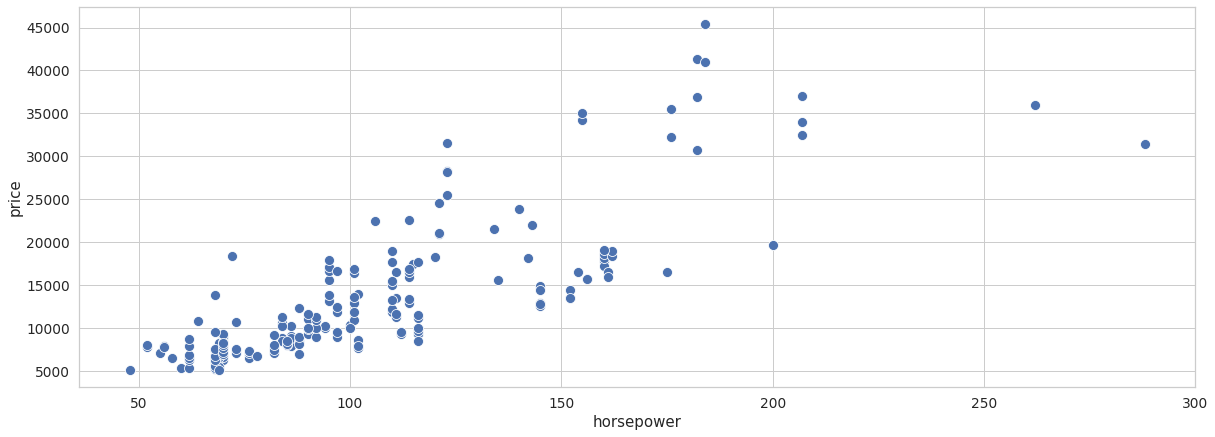

In [88]:
# Посмотрим на scatterplot
sns.scatterplot(data=data_dummy, x="horsepower", y="price", s=100)

In [134]:
import statsmodels.api as sm
import statsmodels.formula.api as smf 

# способ первый
# Y = одномерный массив с ЗП, X - массив со всеми нужными нам НП
# data = data_dummy[['price', 'horsepower']]
X = data_dummy.horsepower
Y = data_dummy.price

In [135]:
X = sm.add_constant(X)  # добавить константу, чтобы был свободный член
model = sm.OLS(Y, X)  # говорим модели, что у нас ЗП, а что НП
results = model.fit()  # строим регрессионную прямую
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     382.2
Date:                Tue, 23 Apr 2024   Prob (F-statistic):           1.48e-48
Time:                        21:19:37   Log-Likelihood:                -2024.0
No. Observations:                 205   AIC:                             4052.
Df Residuals:                     203   BIC:                             4059.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3721.7615    929.849     -4.003      0.0

In [91]:

# # способ второй, потенциально более удобный
# results = smf.logit('price ~ horsepower', data).fit()
# print(results.summary())

In [101]:
int(100 * (results.rsquared))

65

Text(-9.67499999999999, 0.5, 'price')

<Figure size 864x504 with 0 Axes>

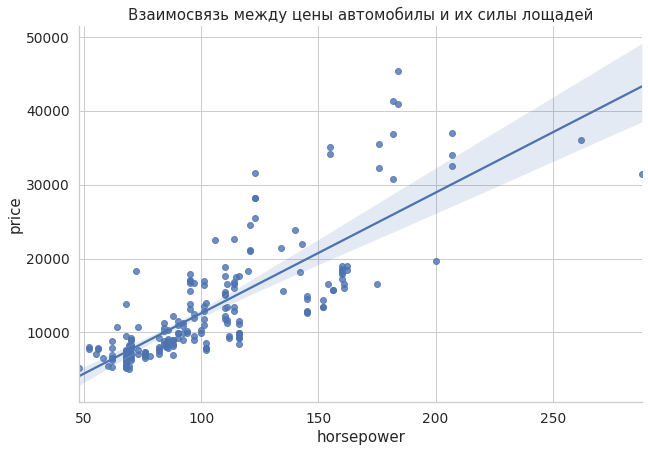

In [130]:
plt.figure(figsize=(12,7))
g = sns.lmplot(x = 'horsepower', y = 'price', data = data_dummy, height=6, aspect=1.5)
# g._legend.set_title('Car prices')
plt.title('Взаимосвязь между цены автомобилы и их силы лощадей')
plt.xlabel('horsepower')
plt.ylabel('price')

In [142]:
results.params

const        -3721.761494
horsepower     163.263061
dtype: float64

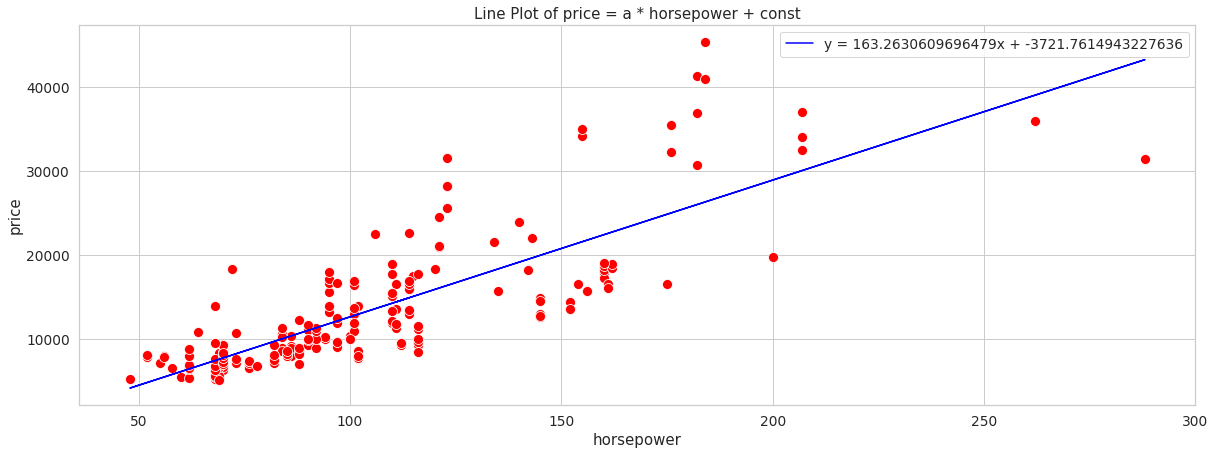

In [150]:
b0 = results.params.const
b1 = results.params.horsepower

sns.scatterplot(data=data_dummy, x="horsepower", y="price", s=100, color='red')
x = data_dummy.horsepower
y = b1 * x + b0
plt.plot(x, y, label='y = {}x + {}'.format(b1, b0), color='blue')
plt.title('Line Plot of price = a * horsepower + const')
plt.xlabel('horsepower')
plt.ylabel('price')
plt.legend()
plt.show()

7. Теперь построим ещё две модели:

    - модель со всеми предикторами

    - модель со всеми предикторами, кроме марок машин

Попробуем выбрать из этих моделей самую удачную! В каком-то смысле это искусство - при выборе моделей приходится ориентироваться не только на количественные показатели, но также на контекст её использования, опыт и здравый смысл.

Посмотрите на показатели всех трёх моделей. Выберите верные утверждения:

In [104]:
data_dummy.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,company_audi,company_bmw,...,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,88.6,168.8,64.1,2548,130,3.47,111,13495.0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,88.6,168.8,64.1,2548,130,3.47,111,16500.0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,94.5,171.2,65.5,2823,152,2.68,154,16500.0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,99.8,176.6,66.2,2337,109,3.19,102,13950.0,1,0,...,1,0,0,0,0,1,0,0,0,0
4,99.4,176.6,66.4,2824,136,3.19,115,17450.0,1,0,...,1,0,0,0,1,0,0,0,0,0


In [105]:
X = data_dummy.drop(columns='price')
Y = data_dummy.price

In [108]:
X = sm.add_constant(X)  # добавить константу, чтобы был свободный член
model_all_predicators = sm.OLS(Y, X)  # говорим модели, что у нас ЗП, а что НП
results_all_predicators = model_all_predicators.fit()  # строим регрессионную прямую
print(results_all_predicators.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     81.09
Date:                Tue, 23 Apr 2024   Prob (F-statistic):           4.86e-89
Time:                        20:50:37   Log-Likelihood:                -1804.2
No. Observations:                 205   AIC:                             3702.
Df Residuals:                     158   BIC:                             3858.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -3.472e+

In [111]:
# Результат модели где включены все предикаторы
int(100 * results_all_predicators.rsquared)

95

In [116]:
cols = []
for i in data_dummy.columns:
    if not i.startswith('company'):
        cols.append(i)
cols

['wheelbase',
 'carlength',
 'carwidth',
 'curbweight',
 'enginesize',
 'boreratio',
 'horsepower',
 'price',
 'fueltype_gas',
 'aspiration_turbo',
 'carbody_hardtop',
 'carbody_hatchback',
 'carbody_sedan',
 'carbody_wagon',
 'drivewheel_fwd',
 'drivewheel_rwd',
 'enginetype_dohcv',
 'enginetype_l',
 'enginetype_ohc',
 'enginetype_ohcf',
 'enginetype_ohcv',
 'enginetype_rotor',
 'cylindernumber_five',
 'cylindernumber_four',
 'cylindernumber_six',
 'cylindernumber_three',
 'cylindernumber_twelve',
 'cylindernumber_two']

In [117]:
data_without_comp = data_dummy[cols]

In [118]:
X = data_without_comp.drop(columns='price')
Y = data_without_comp.price

X = sm.add_constant(X)  # добавить константу, чтобы был свободный член
model_without_comp = sm.OLS(Y, X)  # говорим модели, что у нас ЗП, а что НП
results_without_comp = model_without_comp.fit()  # строим регрессионную прямую
print(results_without_comp.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     72.32
Date:                Tue, 23 Apr 2024   Prob (F-statistic):           9.86e-81
Time:                        20:57:49   Log-Likelihood:                -1881.6
No. Observations:                 205   AIC:                             3817.
Df Residuals:                     178   BIC:                             3907.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -1.7e+

In [119]:
# Результат модели где включены все предикаторы кроме марок машины
int(100 * results_without_comp.rsquared)

91

In [122]:
# Результат:

# Модель с одним предикатором (horsepower) показал R^2 = 65 %
# Модель всеми предикаторами показал R^2 = 95 %
# Модель всеми предикаторами кроме марок машины (company) показал R^2 = 91 %


# ---- Большинство коэффициентов, связанных с марками машин, статистически незначимы
# ---- Если судить чисто по диагностическим показателям (вроде R2), то модель со всеми предикторами лучшая

8. Вы могли обратить внимание, что хотя марки машин и объясняют какую-то часть общей дисперсии в данных, эта часть не самая большая - около 5%. На фоне того, как эта переменная усложняет модель дополнительными статнезначимыми коэффициентами, мы можем принять решение выкинуть её из модели либо дополнительно переделать. Однозначно правильного решения тут нет.

Но допустим, что мы действительно решили избавиться от этого предиктора и взять вторую модель с предыдущего шага! Заполните пропуски:

In [123]:
# Выбранная модель объясняет примерно 90 % дисперсии (окр. до целого). 
# Среди предикторов 10 из 27 оказались не значимыми (p > 0.05). 
# Пример интерпретации: при единичном изменении показателя horsepower, 
# цена  ВОЗРАСТАЕТ на 86.8164 (без округления).

In [ ]:
# sns.pairplot(data_without_comp, kind = 'reg')